На основании модели Кронига-Пени промоделировать зонную структуру одномерного кристалла.
Проанализировать изменение ширины запрещенных зон для двух крайних случаев, когда электрон совершенно свободен и когда электрон заперт внутри одной потенциальной ямы, т.е. стенки непроницаемы, а также промежуточные случаи.

$V(x) = \begin{cases} U, & nc + a < x < (n + 1)c \\ 0, & nc < x < nc + a \end{cases}$
где a - ширина ямы, c - постоянная кристаллической решетки, $n = 0, \pm 1, \pm 2 ....$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Зададим наши параметры. m - масса электрона, кг, hbar - постоянная Планка, COUNT - число измерений. Сразу преобразуем в стандартные единицы (метры, джоули)

In [2]:
U = 10
a = 1
c = 2
m = 9.10938356e-31
hbar = 1.0545718e-34
COUNT = 1000

a *= 1e-9
c *= 1e-9
U *= 1.60218e-19

Зададим массивы энергий, ограничим их значением, превыщающим высоту барьера на 50%. 

In [3]:
Eval = np.linspace(0, 1.5 * U, COUNT)

Рассмотрим массив энергий. Для каждого $E$:
- Вычислим волновые векторы $k_1, k_2$
- Вычислим $\cos(kc)$ с помощью дисперсионного уравнения Кронига-Пенни. В случае, если $k_1$ или $k_2$ равны 0, то $\cos$ не определен. Иначе разбиваем на 2 части.
    - $\cos(k_1 \cdot a) \cdot \cos(k_2 \cdot (c-a))$
        - $k_1a$ описывает осцилляции или затухание волновой функции внутри ямы.
        - $k_2(c-a)$ описывает осцилляции или затухание волновой функции внутри барьера.
    - $-\frac{k_1^2 + k_2^2}{2 \cdot k_1 \cdot k_2} \cdot \sin(k_1 \cdot a) \cdot \sin(k_2 \cdot (c - a))$ - корректировка для взаимодействия в яме и барьере.
Итог: $$\cos(kc) = \cos(k_1 \cdot a) \cdot \cos(k_2 \cdot (c-a))-\frac{k_1^2 + k_2^2}{2 \cdot k_1 \cdot k_2} \cdot \sin(k_1 \cdot a) \cdot \sin(k_2 \cdot (c - a))$$
Эти шаги описывают, как электрон ведет себя в кристалле, где есть повторяющиеся участки с высоким и низким потенциалом.

In [4]:
coss = []

for E in Eval:
    k1 = np.sqrt(2 * m * abs(E - U)) / hbar * (1 if E > U else 1j)
    k2 = 0 if E <= 0 else np.sqrt(2 * m * E) / hbar
    
    cos = np.inf if k1 == 0 or k2 == 0 else \
        (np.cos(k1 * a) * np.cos(k2 * (c - a))
         - (k1**2 + k2**2) / (2 * k1 * k2) * np.sin(k1 * a) * np.sin(k2 * (c - a)))
    
    coss.append(cos)
    
pd.DataFrame([{"E": Eval[i], "cos": coss[i]} for i in range(len(Eval))])

,E,cos
0,0.000000e+00,inf+0.000000e+ 00j
1,2.405676e-21,4.491834e+07+0.000000e+ 00j
2,4.811351e-21,4.069397e+07+0.000000e+ 00j
3,7.217027e-21,3.674233e+07+0.000000e+ 00j
4,9.622703e-21,3.304940e+07+0.000000e+ 00j
...,...,...
995,2.393647e-18,1.092664e+00+0.000000e+ 00j
996,2.396053e-18,1.097951e+00+0.000000e+ 00j
997,2.398459e-18,1.102450e+00+0.000000e+ 00j
998,2.400864e-18,1.106161e+00+0.000000e+ 00j


Переведем обратно в эВ. 

Так же зададим волновые векторы k от $-\frac{\pi}{c}$ до $\frac{\pi}{c}$ (Первая зона Брюллера).

Перебираем разрешенные зоны и для каждой зоны добавляем точку на графике. В прошлом пункте, по массиву coss мы можем понять, в каких местах электрон может находиться (разрешенные зоны) и где он не может быть (запрещенные зоны). 

Для каждого $E_i$ проверим, что $|coss_i| \leq 1$. Если подходит - добавляем точку на графике.

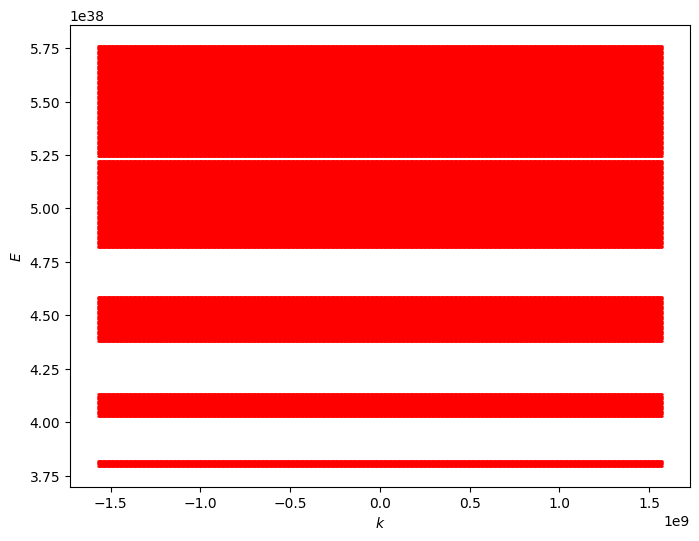

In [7]:
Eval = Eval / 1.60218e-19
kval = np.linspace(-math.pi / c, math.pi / c, COUNT)

plt.figure(figsize=(8, 6))

for e, is_allowed in zip(Eval, [-1 <= i <= 1 for i in coss]):
    if not is_allowed: continue
    plt.scatter(kval, [e] * len(kval), s=0.5, color='red')
    
plt.xlabel("$k$")
plt.ylabel("$E$")
plt.show()